In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [15]:
df.describe()
df.shape

(15, 2)

In [9]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

In [11]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [12]:
df = df.drop_duplicates()

In [14]:
df.shape

(15, 2)

<AxesSubplot:ylabel='Chirps/Second'>

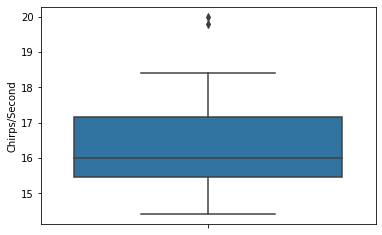

In [18]:
import seaborn as sns
sns.boxplot(y = df["Chirps/Second"])

In [20]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [28]:
q1 = df['Chirps/Second'].quantile(0.25)
q3 = df['Chirps/Second'].quantile(0.75)
iqr = q3-q1
outlier = df[(df<(q1-1.5*iqr)) |(df>(q3+1.5*iqr)) ]
outlier

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,NaN,71.6
2,19.8,93.3
3,NaN,84.3
4,NaN,80.6
5,NaN,75.2
6,NaN,69.7
7,NaN,71.6
8,NaN,69.4
9,NaN,83.3


<AxesSubplot:ylabel='Ground Temperature'>

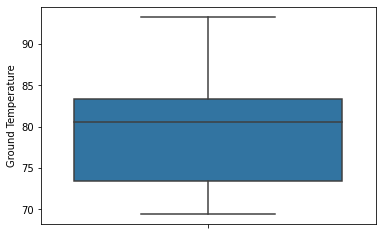

In [19]:
import seaborn as sns
sns.boxplot(y = df["Ground Temperature"])

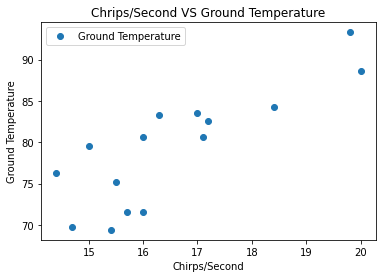

In [36]:
df.plot(x ='Chirps/Second', y = 'Ground Temperature', style = 'o')
plt.title('Chrips/Second VS Ground Temperature')
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature')
plt.show()

In [37]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [48]:
X = df.loc[:,['Ground Temperature']].values
y = df.loc[:,'Chirps/Second']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

7     15.7
13    17.0
11    17.2
1     16.0
12    16.0
14    14.4
5     15.5
4     17.1
6     14.7
3     18.4
2     19.8
8     15.4
Name: Chirps/Second, dtype: float64

In [50]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 

regressor.fit(X_train, y_train)

LinearRegression()

In [52]:
print(regressor.coef_, regressor.intercept_)

[0.19741789] 1.2352130828800867


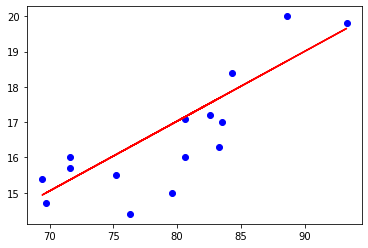

In [55]:
plt.scatter(X, y, color='blue')
plt.plot(X, regressor.predict(X), color = 'red')

In [57]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
10,15.0,16.949677
12,16.0,17.147095
14,14.4,16.298198


In [62]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: -5.673641539914959


Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [65]:
Ground_Tem = 95
chrisp = regressor.coef_*(Ground_Tem) + regressor.intercept_
chrisp

array([19.98991276])

If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
The Answer is 19.98991276

In [67]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [68]:
X = df.loc[:,['Chirps/Second']].values
y = df.loc[:,'Ground Temperature']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [69]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 

regressor.fit(X_train, y_train)

LinearRegression()

In [70]:
crisp = 18
temp = regressor.coef_*crisp + regressor.intercept_
temp

array([83.41147508])

In [ ]:
Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning
    The temperature is : 83.41147508